In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

circuit_df = pd.read_csv('../../Ressources_filtrer/circuits_filtered.csv')
constructor_r_df = pd.read_csv('../../Ressources_filtrer/constructor_r_filtered.csv')
constructors_df = pd.read_csv('../../Ressources_filtrer/constructors_filtered.csv')
driver_standings_df = pd.read_csv('../../Ressources_filtrer/driver_standings_filtered.csv')
drivers_df = pd.read_csv('../../Ressources_filtrer/drivers_filtered.csv')
lap_times_df = pd.read_csv('../../Ressources_filtrer/lap_times_filtered.csv')
pit_stops_df = pd.read_csv('../../Ressources_filtrer/pit_stops_filtered.csv')
qualifying_df = pd.read_csv('../../Ressources_filtrer/qualifying_filtered.csv')
races_df = pd.read_csv('../../Ressources_filtrer/races_filtered.csv')
results_df = pd.read_csv('../../Ressources_filtrer/results_filtered.csv')
weather_df = pd.read_csv('../../Ressources_filtrer/weather_filtered_f1.csv')

races_weather_df = pd.merge(races_df, weather_df, left_on='date', right_on='date', how='inner')
results_weather_df = pd.merge(results_df, races_weather_df, on='raceId', how='inner')
final_df = pd.merge(results_weather_df, constructors_df, on='constructorId', how='inner')

print(final_df.columns)


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionOrder', 'points', 'laps', 'time_x', 'milliseconds',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'year', 'round', 'circuitId', 'name_x', 'date', 'time_y', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'city_name',
       'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'sunshine_total_min',
       'avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm',
       'constructorRef', 'name_y', 'nationality'],
      dtype='object')


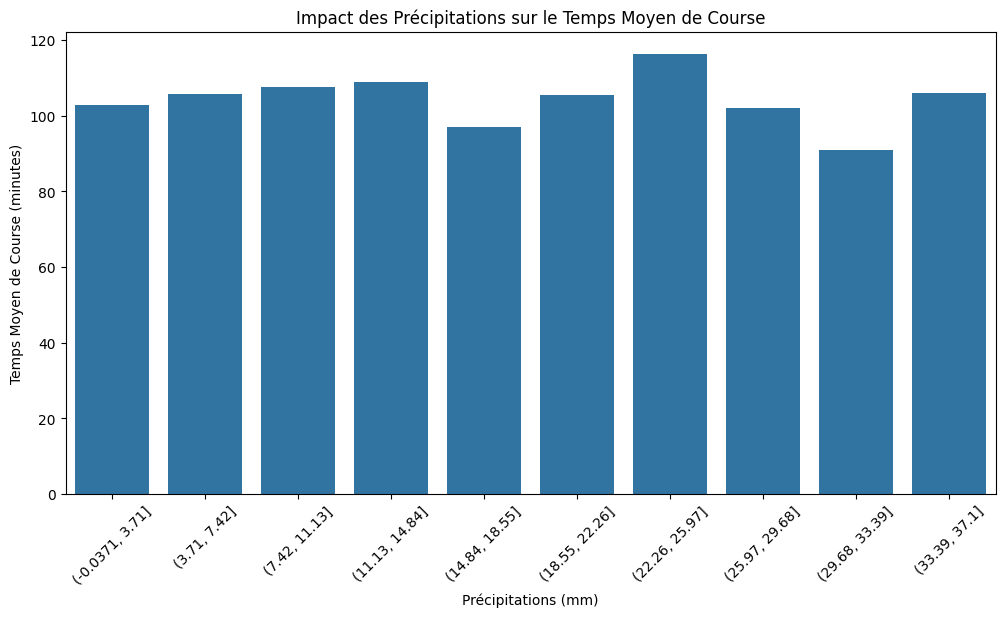

In [48]:
precipitation_bins = pd.cut(final_df['precipitation_mm'], bins=10)
avg_race_time = final_df.groupby(precipitation_bins, observed=False)['milliseconds'].mean().reset_index()
avg_race_time['race_time_minutes'] = avg_race_time['milliseconds'] / 60000

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_race_time['precipitation_mm'], y=avg_race_time['race_time_minutes'])
plt.title("Impact des Précipitations sur le Temps Moyen de Course")
plt.xlabel("Précipitations (mm)")
plt.ylabel("Temps Moyen de Course (minutes)")
plt.xticks(rotation=45)
plt.show()

In [49]:
non_numeric_rows = final_df[pd.to_numeric(final_df['milliseconds'], errors='coerce').isna()]
final_df['milliseconds'] = pd.to_numeric(final_df['milliseconds'], errors='coerce')
final_df = final_df.dropna(subset=['milliseconds'])

In [45]:
no_rain_df = final_df[final_df['precipitation_mm'] == 0]
rain_df = final_df[final_df['precipitation_mm'] > 0]

mean_time_no_rain = no_rain_df['milliseconds'].mean()
mean_time_rain = rain_df['milliseconds'].mean()
rain_multiplier = mean_time_rain / mean_time_no_rain

print(f"Temps moyen des courses sans pluie : {mean_time_no_rain / 1000 / 60:.2f} minutes")
print(f"Temps moyen des courses avec pluie : {mean_time_rain / 1000 / 60:.2f} minutes")
print(f"Le temps de course est multiplié par {rain_multiplier:.2f} quand il pleut.")

Temps moyen des courses sans pluie : 106.64 minutes
Temps moyen des courses avec pluie : 102.17 minutes
Le temps de course est multiplié par 0.96 quand il pleut.


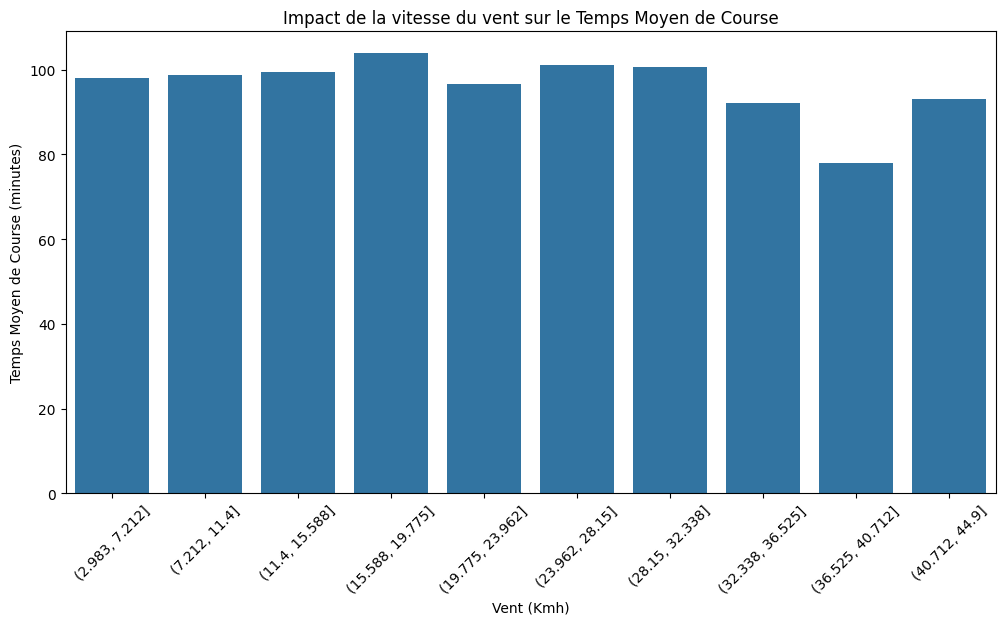

In [50]:
wind_bins = pd.cut(final_df['avg_wind_speed_kmh'], bins=10)
avg_race_time = final_df.groupby(wind_bins, observed=False)['milliseconds'].mean().reset_index()
avg_race_time['race_time_minutes'] = avg_race_time['milliseconds'] / 60000

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_race_time['avg_wind_speed_kmh'], y=avg_race_time['race_time_minutes'])
plt.title("Impact de la vitesse du vent sur le Temps Moyen de Course")
plt.xlabel("Vent (Kmh)")
plt.ylabel("Temps Moyen de Course (minutes)")
plt.xticks(rotation=45)
plt.show()

In [53]:
no_wind_df = final_df[final_df['avg_wind_speed_kmh'] <= 16]
wind_df = final_df[final_df['avg_wind_speed_kmh'] > 16]

mean_time_no_wind = no_wind_df['milliseconds'].mean()
mean_time_wind = wind_df['milliseconds'].mean()
wind_multiplier = mean_time_wind / mean_time_no_wind

print(f"Temps moyen des courses sans vent : {mean_time_no_wind / 1000 / 60:.2f} minutes")
print(f"Temps moyen des courses avec vent : {mean_time_wind / 1000 / 60:.2f} minutes")
print(f"Le temps de course est multiplié par {wind_multiplier:.2f} quand il vente.")

Temps moyen des courses sans vent : 98.95 minutes
Temps moyen des courses avec vent : 101.27 minutes
Le temps de course est multiplié par 1.02 quand il vente.


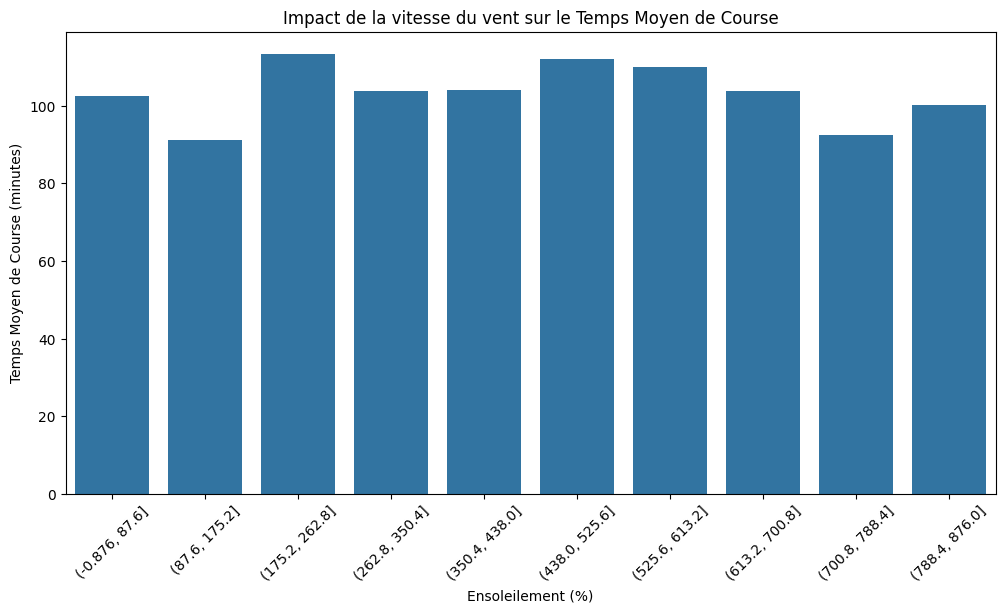

In [54]:
sun_bins = pd.cut(final_df['sunshine_total_min'], bins=10)
avg_race_time = final_df.groupby(sun_bins, observed=False)['milliseconds'].mean().reset_index()
avg_race_time['race_time_minutes'] = avg_race_time['milliseconds'] / 60000

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_race_time['sunshine_total_min'], y=avg_race_time['race_time_minutes'])
plt.title("Impact de la vitesse du vent sur le Temps Moyen de Course")
plt.xlabel("Ensoleilement (%)")
plt.ylabel("Temps Moyen de Course (minutes)")
plt.xticks(rotation=45)
plt.show()

In [55]:
no_sun_df = final_df[final_df['sunshine_total_min'] <= 50]
sun_df = final_df[final_df['sunshine_total_min'] > 50]

mean_time_no_sun = no_sun_df['milliseconds'].mean()
mean_time_sun = sun_df['milliseconds'].mean()
sun_multiplier = mean_time_no_sun / mean_time_sun

print(f"Temps moyen des courses avec peu voire pas de soleil : {mean_time_no_sun / 1000 / 60:.2f} minutes")
print(f"Temps moyen des courses avec du soleil : {mean_time_sun / 1000 / 60:.2f} minutes")
print(f"Le temps de course est multiplié par {sun_multiplier:.2f} quand il y a du soleil.")

Temps moyen des courses avec peu voire pas de soleil : 103.99 minutes
Temps moyen des courses avec du soleil : 104.43 minutes
Le temps de course est multiplié par 1.00 quand il y a du soleil.
